<a href="https://colab.research.google.com/github/petuch03/data-science-things/blob/master/ml_with_python/neural_network_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Homework: neural network from scratch

### Two-layer fully connected neural network in numpy

This task proposes to implement the simple fully connected neural network “from scratch”, that is, only in numpy.
To do this, you need to implement forward pass and backpropagation with updating the weights.

It is advisable to do everything without additional loops, and it is imperative to achieve convergence on the binary classification problem four vertices of a two-dimensional square.

The result of the work should be an implementation (.py or .ipynb) and a clear report (.ipynb or .pdf) with a brief description of the solution and a chart of the resulting convergence.
If possible, run some experiments to speed up convergence by adding regularization or mini-batch learning.

### Overview

Implementation of the 2-layer Neural Network that solves XOR problem with mini-batch learning. Each layer contains sigmoid as activation function.

Each learning epoch starts with permutation of inputs and corresponding targets.

After permutation, learning is performed by each 2-sized mini-batch.

Training process includes loss calculation, forward propagation, and backward propagation.

As a loss function, Mean Square Error is used. Loss for each epoch is calculated as a mean of losses of all mini-batches in this epoch.

I slightly increased the number of epochs (from 10000 to 12000), in order to get more slight loss change from epoch to epoch.

In [1]:
import numpy as np
import sys
import datetime
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def print_with_datetime(s):
    time_string = datetime.datetime.now().strftime("%H:%M:%S")
    sys.stdout.write("\r" + time_string + " " + s)
    sys.stdout.flush()


Initial hidden weights: [0.33741249 0.23073895] [0.99108221 0.25695886]
Initial hidden biases: [0.39417429 0.21888279]
Initial output weights: [0.2949813] [0.12836537]
Initial output biases: [0.58544681]
11:08:58 Epoch 11999 Loss 0.0023
Final hidden weights: [5.86948499 3.83175061] [5.87600228 3.8327389 ]
Final hidden bias: [-2.4873482  -5.87647892]
Final output weights: [7.75085811] [-8.42140934]
Final output bias: [-3.49915791]

Output from neural network after 12000 epochs: [0.05079469] [0.95403404] [0.95400088] [0.04910146]

Loss after 12000 epochs: 0.0023056482919351466

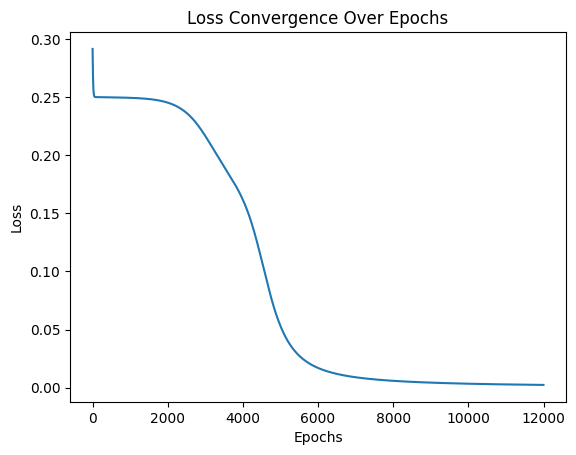

In [4]:
# Input datasets
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
target = np.array([[0], [1], [1], [0]])

epochs = 12000
lr = 0.1
batch_size = 2
input_layer_neurons, hidden_layer_neurons, output_layer_neurons = 2, 2, 1

# Random weights and bias initialization
hidden_weights = np.random.uniform(size=(input_layer_neurons, hidden_layer_neurons))
hidden_bias = np.random.uniform(size=(1, hidden_layer_neurons))
output_weights = np.random.uniform(size=(hidden_layer_neurons, output_layer_neurons))
output_bias = np.random.uniform(size=(1, output_layer_neurons))

loss_history = []

print("Initial hidden weights: ", end='')
print(*hidden_weights)
print("Initial hidden biases: ", end='')
print(*hidden_bias)
print("Initial output weights: ", end='')
print(*output_weights)
print("Initial output biases: ", end='')
print(*output_bias)

# Training algorithm
for epoch in range(epochs):
    # # The training data and corresponding targets are shuffled at the beginning of each epoch to introduce randomness
    permutation = np.random.permutation(len(inputs))
    inputs_shuffled = inputs[permutation]
    target_shuffled = target[permutation]

    batch_losses = []

    # Mini-batch iteration
    for i in range(0, len(inputs), batch_size):
        # Select mini-batch
        inputs_batch = inputs[i:i + batch_size]
        target_batch = target[i:i + batch_size]

        # Forward Propagation
        # hidden_outputs is the output of the hidden layer after applying the sigmoid function.
        hidden_layer_input = np.dot(inputs_batch, hidden_weights) + hidden_bias
        hidden_outputs = sigmoid(hidden_layer_input)

        # predicted_output is the final output of the network after applying the sigmoid function to the output layer's input.
        output_layer_input = np.dot(hidden_outputs, output_weights) + output_bias
        predicted_output = sigmoid(output_layer_input)

        # Loss
        loss = 0.5 * (target_batch - predicted_output) ** 2
        loss = loss.sum()
        batch_losses.append(loss)

        # Backpropagation
        # loss_by_output captures the difference between the predicted output and the target by element
        loss_by_output = predicted_output - target_batch
        # predicted_output_derivative computes the derivative of the sigmoid function applied to predicted_output
        predicted_output_derivative = sigmoid_derivative(predicted_output)

        # loss_by_output_bias and loss_by_output_weights represent the gradients for the bias and weights of the output layer
        loss_by_output_bias = loss_by_output * predicted_output_derivative
        loss_by_output_weights = np.dot(hidden_outputs.T, loss_by_output_bias)

        # loss_by_hidden_outputs calculates the error propagated back to the hidden layer
        loss_by_hidden_outputs = np.dot(loss_by_output_bias, output_weights.T)
        # hidden_outputs_derivative computes the derivative of the sigmoid function applied to hidden_outputs
        hidden_outputs_derivative = sigmoid_derivative(hidden_outputs)
        # loss_by_hidden_bias and loss_by_hidden_weights represents the gradients for the bias and weights of the hidden layer
        loss_by_hidden_bias = loss_by_hidden_outputs * hidden_outputs_derivative
        loss_by_hidden_weights = np.dot(inputs_batch.T, loss_by_hidden_outputs * hidden_outputs_derivative)

        # Updating Weights and Biases
        # The weights and biases are updated by subtracting the product of the learning rate and their respective gradients
        output_bias -= lr * np.sum(loss_by_output_bias, axis=0, keepdims=True)
        output_weights -= lr * loss_by_output_weights
        hidden_bias -= lr * np.sum(loss_by_hidden_bias, axis=0, keepdims=True)
        hidden_weights -= lr * loss_by_hidden_weights

    epoch_loss = np.mean(batch_losses)
    loss_history.append(epoch_loss)
    print_with_datetime("Epoch {} Loss {:.4f}".format(epoch, epoch_loss))

# For calculation predicted output for the whole dataset
hidden_layer_input = np.dot(inputs, hidden_weights) + hidden_bias
hidden_layer_activation = sigmoid(hidden_layer_input)
output_layer_input = np.dot(hidden_layer_activation, output_weights) + output_bias
final_predicted_output = sigmoid(output_layer_input)

print('')
print("Final hidden weights: ", end='')
print(*hidden_weights)
print("Final hidden bias: ", end='')
print(*hidden_bias)
print("Final output weights: ", end='')
print(*output_weights)
print("Final output bias: ", end='')
print(*output_bias)

print(f"\nOutput from neural network after {epochs} epochs: ", end='')
print(*final_predicted_output)
print(f"\nLoss after {epochs} epochs: {loss_history[-1]}", end='')


plt.plot(loss_history)
plt.title("Loss Convergence Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()
